In [62]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
    
housing = load_housing_data()

In [63]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [65]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [66]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


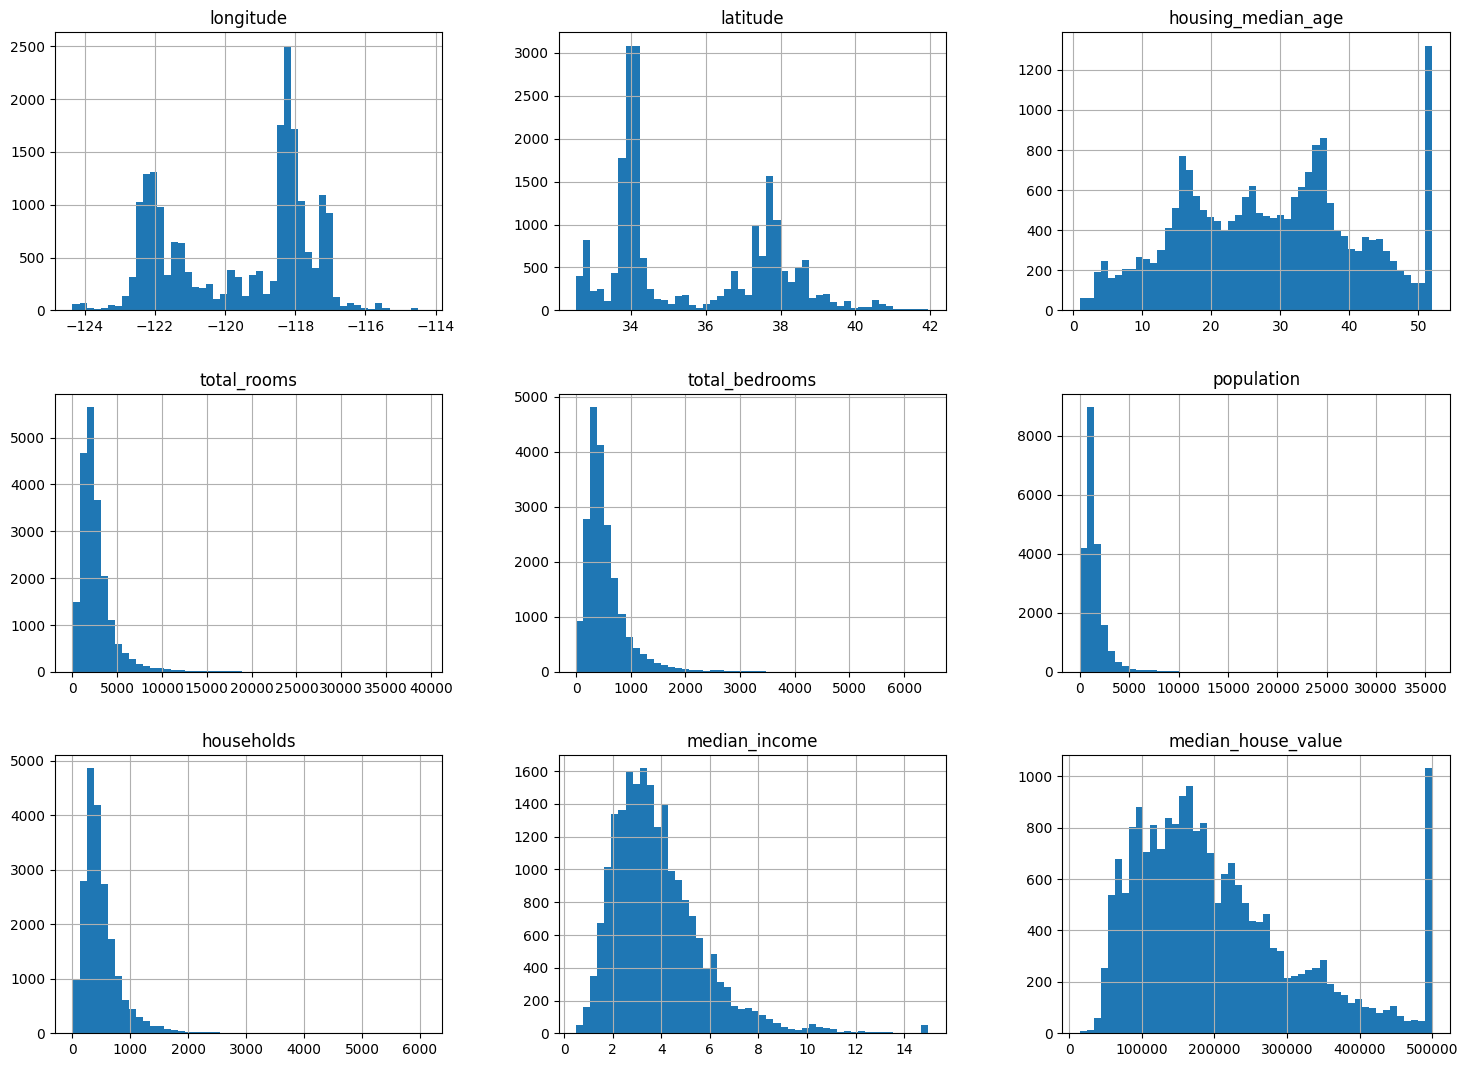

In [67]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(18, 13))
plt.show();

In [68]:
import numpy as np


In [69]:
def shuffle_and_split_data(data, test_ratio):   
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [70]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [71]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
787,-121.90,37.30,52.0,1456.0,269.0,582.0,277.0,5.0360,296600.0,<1H OCEAN
16242,-117.98,33.91,16.0,10621.0,1782.0,3836.0,1480.0,5.0923,257200.0,<1H OCEAN
8953,-119.69,35.62,18.0,820.0,239.0,1345.0,207.0,2.1186,47500.0,INLAND
6901,-120.99,37.62,37.0,2014.0,505.0,1787.0,515.0,1.5515,54100.0,INLAND
4963,-121.41,38.61,36.0,3099.0,605.0,1322.0,623.0,3.4784,105500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
4060,-117.68,34.11,16.0,3190.0,471.0,1414.0,464.0,5.5292,208600.0,INLAND
7662,-121.88,37.36,42.0,2087.0,402.0,1342.0,423.0,4.2149,199000.0,<1H OCEAN
12415,-120.46,39.83,18.0,3406.0,673.0,1567.0,617.0,2.2717,75900.0,INLAND
1173,-118.15,33.85,36.0,1435.0,249.0,606.0,234.0,4.1439,212600.0,<1H OCEAN


In [72]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2363,-118.52,34.21,34.0,1663.0,299.0,762.0,282.0,5.1265,211000.0,<1H OCEAN
19371,-119.02,35.35,42.0,1239.0,251.0,776.0,272.0,1.9830,63300.0,INLAND
6375,-117.58,33.87,34.0,1511.0,272.0,773.0,265.0,3.5313,142100.0,INLAND
8028,-117.90,33.83,33.0,3065.0,611.0,2204.0,606.0,3.8456,211800.0,<1H OCEAN
19493,-120.71,37.39,40.0,680.0,160.0,785.0,175.0,2.6058,72700.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
5754,-118.12,34.07,45.0,1770.0,423.0,1410.0,389.0,3.0592,212500.0,<1H OCEAN
18186,-122.29,37.88,46.0,1895.0,442.0,920.0,425.0,2.9926,192100.0,NEAR BAY
8516,-119.02,35.39,30.0,227.0,75.0,169.0,101.0,1.3527,60000.0,INLAND
14945,-121.00,39.16,10.0,1170.0,225.0,537.0,194.0,3.2813,163200.0,INLAND


In [73]:
from zlib import crc32


In [74]:
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

In [75]:
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x : is_id_in_test_set(x , test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [76]:
# Using the row index as ID
housing_with_ID = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_ID, 0.2, "index")

In [77]:
# Using column value to create uniue IDs
housing_with_ID['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_data_with_id_hash(housing_with_ID, 0.2, "id")

In [78]:
housing_with_ID

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [79]:
# Can also use from Sklearn
from sklearn.model_selection import train_test_split

In [80]:
train_set, test_set = train_test_split(housing , test_size = 0.2, random_state=42)

* **Taking a look at the histogram for median income, most median income values are saturated from $15000 to $60000 but some go far beyond 6.**
* **It is important to have sufficient number of instances in your dataset from each stratum or its estimate of importance will be biased.**

In [81]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels = [1,2,3,4,5])


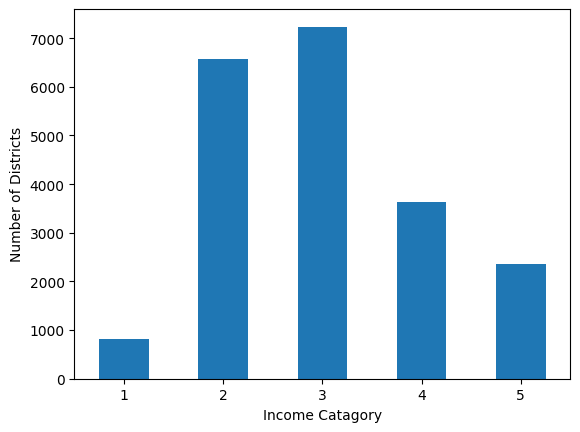

In [82]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0)
plt.xlabel("Income Catagory")
plt.ylabel("Number of Districts")
plt.show()

* **Stratified Sampling using Scikit-learn**

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]): 
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [84]:
# shorter way to get train test split

strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing["income_cat"], random_state=42)

In [85]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

* **Dropping 'income_cat" column as it not necessary anymore** 

In [86]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [87]:
housing = strat_train_set.copy()

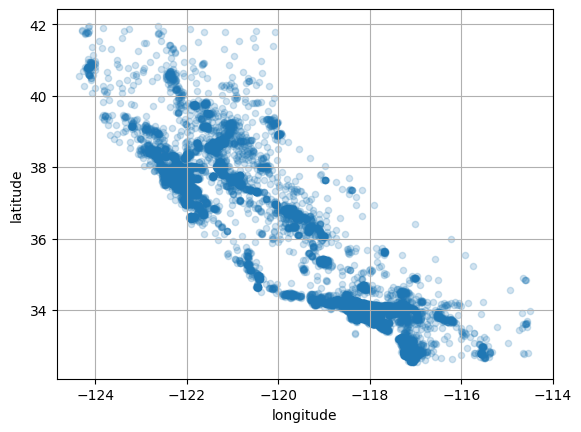

In [88]:
housing.plot(kind = 'scatter' , x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show();

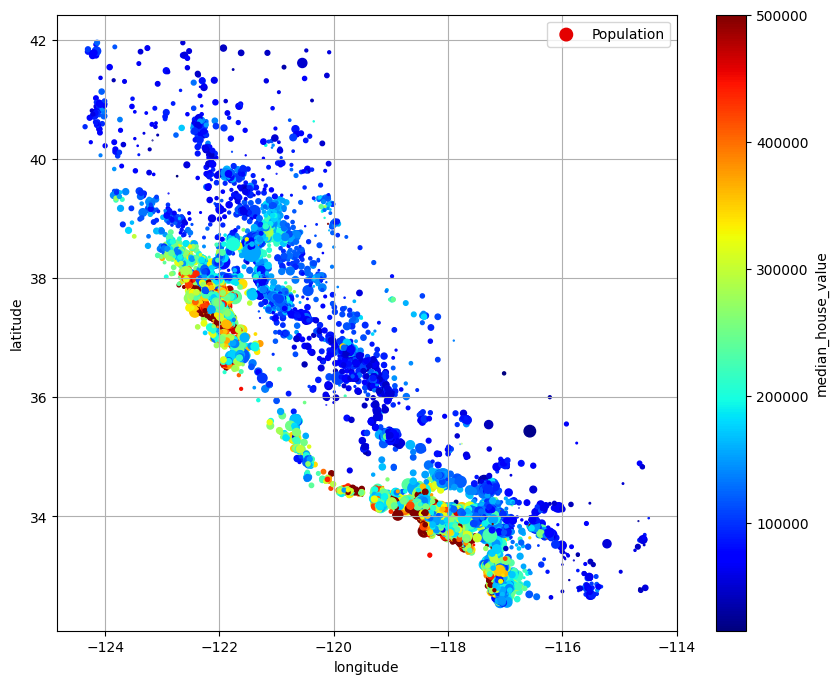

In [89]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True,
             s = housing['population']/100 , label = "Population", c = 'median_house_value', cmap = 'jet',
             colorbar = True,sharex = False,figsize = (10, 8))
plt.show();

In [90]:
corr_matrix = housing.corr(numeric_only=True)

In [91]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

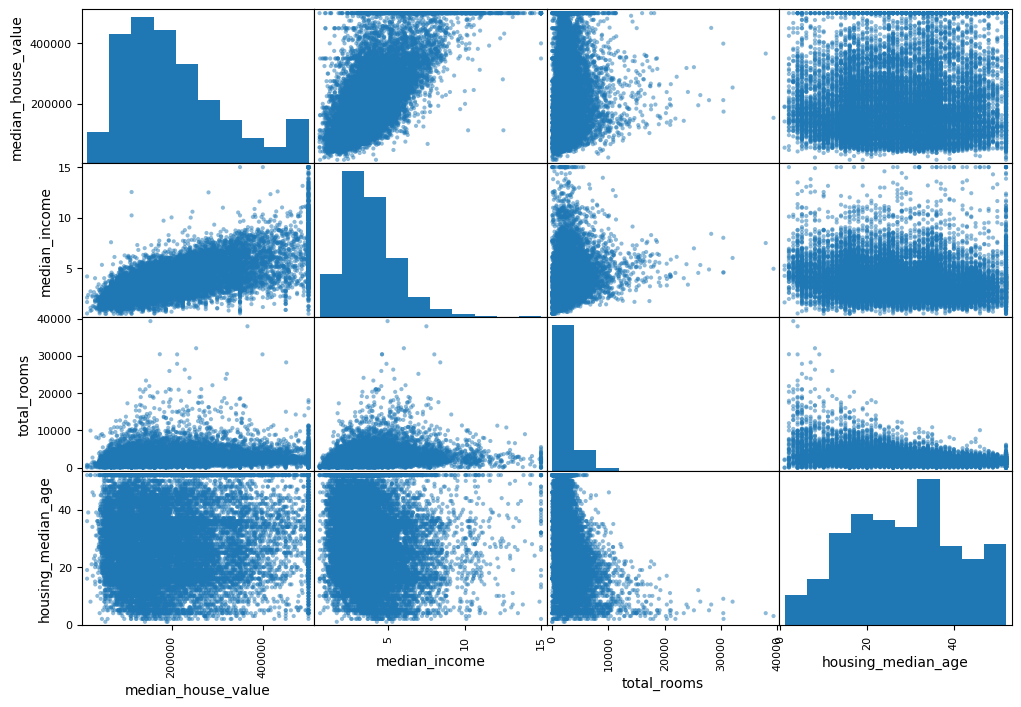

1

In [92]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show();1

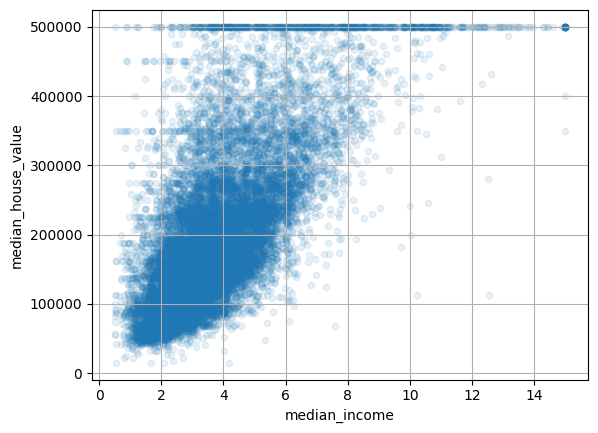

In [93]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

In [94]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]


In [95]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [96]:
housing = strat_train_set.drop("median_house_value", axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

* **Here we will use SimpleImputer instead of pandas median function as it will make it possible to impute values on all sets and also on any new data that will be fed to the model.**

In [97]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [98]:
housing_num = housing.select_dtypes(include = [np.number])

In [99]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [100]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [101]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [102]:
X = imputer.transform(housing_num)

* **Other better imputers available are KNNImputer and IterativeImputer.**

In [103]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [104]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [105]:
housing_cat = housing[['ocean_proximity']]

In [106]:
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


* **Since this is catogorical attribute, to make it useful for a ML model we convert it to numeric values.**

In [107]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [108]:
housing_cat_encoded[:5]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [109]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [110]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [111]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [112]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [121]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [122]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [123]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", 'NEAR BAY']})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [124]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [125]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [126]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [127]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [128]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [129]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),columns=cat_encoder.get_feature_names_out(),index=df_test_unknown.index)